# ORIE 4580/5580/5581 Assignment 5

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday, October 13, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [24]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd




---
---


# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

___
## Ans.


Let x be the number of visits by tagged birds, the mean of Poisson distribution is $E[x] = \lambda$ \
By method of moment $$\lambda = 6$$ \
so the number of visits by 1 bird is $6/10 = 0.6$ \
Since for each week an average of 28.8 birds visits, assume we have P birds in total, $$0.6P = 28.8$$ \
$$ P = 48 $$


___

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

___

## Ans.
we want to maximize the probability that 20 unique birds visiting the feeding station, out of which 4 are tagged. \
possible combinations of 20 birds visiting and 4 of them are tagged = comb(n-10,16)*comb(10,4) \
total possible combinations are comb(n,20)


50


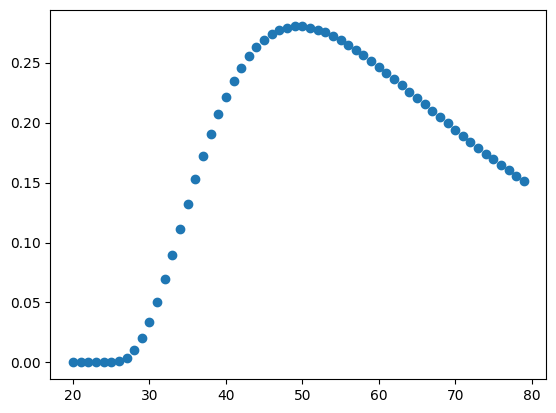

In [67]:
from scipy.special import comb

def logprob(n):
    return comb(n-10,16)*comb(10,4)/comb(n,20)

x = np.arange(20,80)
plt.plot(x,logprob(x),'o')
idx = np.argmax(logprob(x))
mle = x[idx]
print(mle)

MLE is 50

___
___

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

___

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?
___


## Ans.


\begin{align*}
\text{if N < 40: } P(Y = N) = (1-p)^Np \\
\text{if N = 40: } P(Y = N) = p\sum_{k=40}^{∞}(1-p)^N \\
= p(1-p)^{40}\sum_{k=0}^{∞}(1-p)^N = \frac{p(1-p)^{40}}{p} = (1-p)^{40}\\
\text{otherwise: } P(Y = N) = 0
\end{align*}

___

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.
___

## Ans.


In [ ]:
df_soup = pd.read_csv("/content/drive/MyDrive/orie4580/Soup_sales_data.csv")

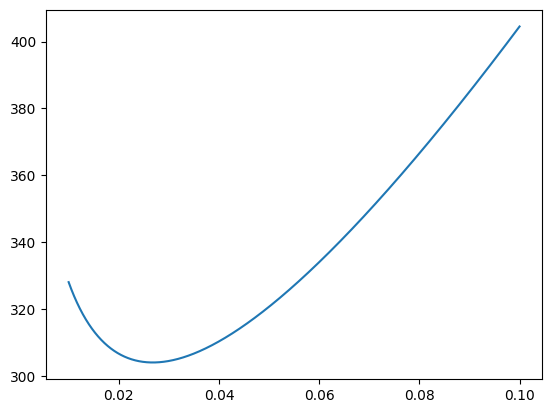

(303.99343020713997, 0.026800000000000285)


In [ ]:
import math
from functools import partial
import matplotlib.pyplot as plt

def logProb(p, x):
  if x < 40:
    return x * math.log(1 - p) + math.log(p)
  elif x == 40:
    return 40 * math.log(1 - p)

prob = []
sumLogP = []
p = 0.01
step = 0.00005
while p <= 0.1:
  sumLogP.append(-df_soup['Y'].apply(partial(logProb, p)).sum())
  prob.append(p)
  p += step

plt.plot(prob, sumLogP)
plt.show()
print(min(zip(sumLogP, prob)))

___
___

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

___

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.
___

## Ans.

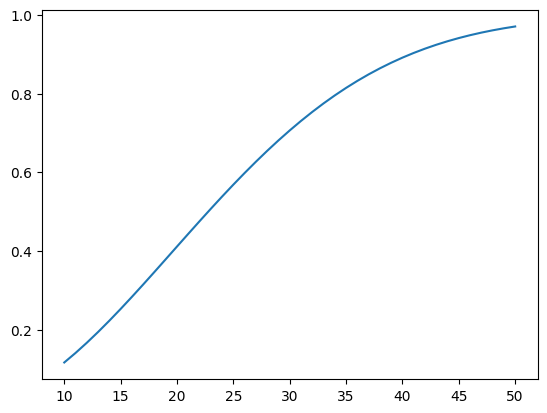

In [19]:
import numpy as np
import matplotlib.pyplot as plt

logP = [0]
ppl = [1]

for x in range(2, 51):
  logP.append(logP[-1] + np.log((365 - x + 1) / 365))
  ppl.append(x)

prob = 1 - np.exp(logP)

plt.plot(ppl[9:], prob[9:])
plt.show()


___
**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.
___

## Ans.

In [21]:
N = 1500
means = []
stds = []
left = []
right =[]
for n in range(15, 31):

  sample = np.random.randint(low = 1, high=365, size = (N,n))
  res = np.zeros(N)

  for i in range(N):
    if len(set(sample[i])) < n:
      res[i] =1
  mean = sum(res)/N
  means.append(mean)

  s = np.std(res)
  err = 1.97 * s/np.sqrt(N)
  left.append(mean - err)
  right.append(mean + err)


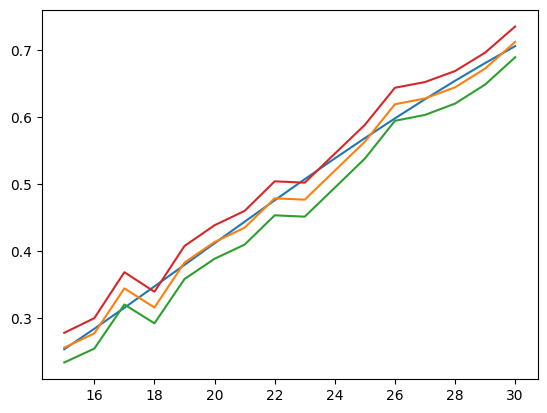

In [22]:

plt.plot(ppl[14:30], prob[14:30])
plt.plot(ppl[14:30], means)
plt.plot(ppl[14:30], left)
plt.plot(ppl[14:30], right)
plt.show()




---

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)
___

## Ans.

In [26]:
# For loading the data, you can use "df = pd.read_csv('bdaydata.txt',sep=' ')"
# Please note that the txt file needs to be placed in the same folder with the ipynb file.
# To extract the counts column as a vector, use "df.values[:,1]"
df = pd.read_csv("/content/drive/MyDrive/orie4580/bdaydata.txt", sep=' ')


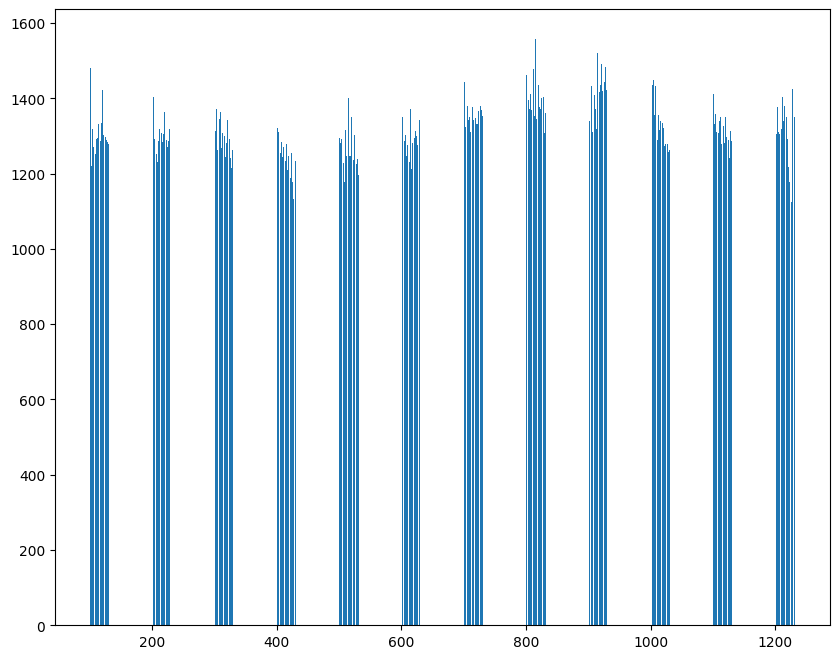

In [27]:

plt.figure(figsize=[10,8])

plt.bar(df['date'], df['count'])

# Display the histogram plot
plt.show()


In [28]:
from scipy.stats import expon, foldnorm, norm

def emp_cdf(df):
  n = df['count'].sum()

  cdf = []
  sum = 0
  for x in df['count']:
    sum += x
    cdf.append(sum / n)

  return np.arange(1, 366), cdf


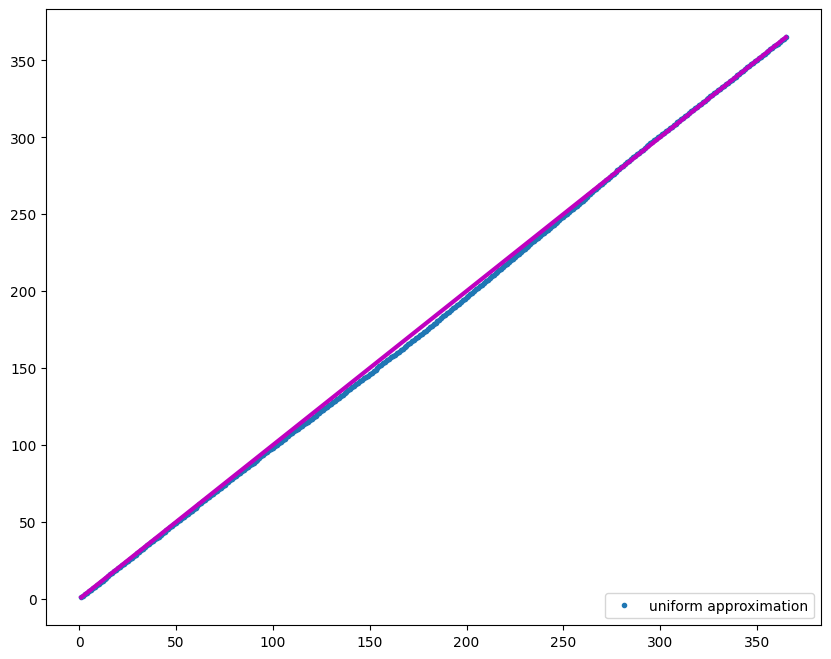

In [29]:
# # For this part, we use an even smaller dataset, retaining only the first 20 samples
plt.figure(figsize=[10, 8])

# Calculate the empirical CDF of the dataset
x, ecdf = emp_cdf(df)

z_1 = np.multiply(ecdf, 365.0)

# Plot the uni approximation as a yellow dotted line
plt.plot(x, z_1, '.', linewidth=0.001, label='uniform approximation')  # Points in the Q-Q plot
plt.plot(x, x, 'm', linewidth=3)  # Theoretical quantiles as a magenta dotted line

# Add a legend to the plot
plt.legend(loc=4)

# Show the plot
plt.show()


___

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

___

## Ans.


In [31]:
from scipy.stats import chisquare

n = df['count'].sum()
k = 365
s = 0
obs = df['count']
exp = np.empty(365)
exp.fill(n/365)


In [32]:
chi_sq_result = chisquare(obs,exp,ddof=s)
print(chi_sq_result)

Power_divergenceResult(statistic=1352.7233599950073, pvalue=1.2489373800065057e-113)


Based on the chi-squared test, we should reject the null hypothesis. Uniform distribution is not a good fit since pvalue is smaller than 0.05

In [37]:
import scipy
Hyp_cdf = np.arange(1, 366)/365
X_sort = np.arange(1, 366)

# Calculate the Kolmogorov-Smirnov (KS) statistic
D_KS = np.max(np.concatenate((np.abs(Hyp_cdf[1:] - ecdf[:-1]), np.abs(Hyp_cdf - ecdf)), axis=0))

# Print the KS statistic
print("The KS statistic is D = " + str(round(D_KS, 8))+'\n')


The KS statistic is D = 0.01276614



In [65]:
from scipy.stats import kstest
vals = []
for val, index in df.iterrows():
  vals.extend([val] * index['count'])
kstest(rvs=vals,cdf="uniform", args=(0, 365), N=n)

KstestResult(statistic=0.012766143582639944, pvalue=1.761773563266988e-68, statistic_location=178, statistic_sign=-1)

the KS statistic is small, and p value is smaller than 0.05, so the null hypothesis is rejected, indicating a significant difference between the data and the hypothesized distribution.
\
The chi-squared test has a small p-value, meaning that the null hypothesis is rejected, so it also supports that the data does not follow a uniform distribution

___

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

___

## Ans.


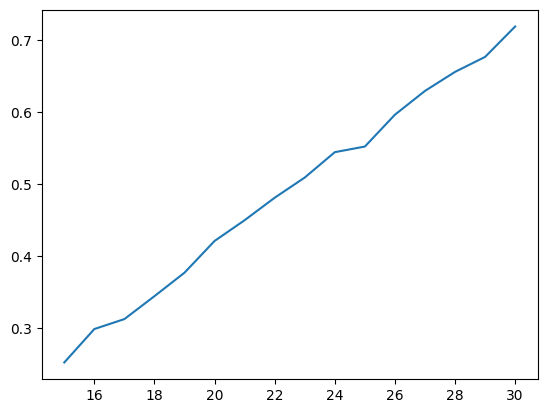

In [ ]:
from scipy.stats import expon, foldnorm

import matplotlib.pyplot as plt
import random

trials = 5000

prob = []
size = []
err = []

for x in range(15, 30+1):
  success = 0
  for _ in range(trials):
    randomList = random.choices(df['date'], weights=df['count'], k=x)
    if len(set(randomList)) < len(randomList):
      success += 1
  prob.append(success / trials)
  size.append(x)

plt.plot(size, prob)
plt.show()


___
___

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



___

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials.
___


## Ans.

In [72]:
import numpy as np
from scipy.special import factorial
n = 1500
fact_series = factorial(np.arange(n),exact=True)
first_digit = np.zeros(n)
for i in range(n):
  first_digit[i] = int(str(fact_series[i])[0])

<BarContainer object of 9 artists>

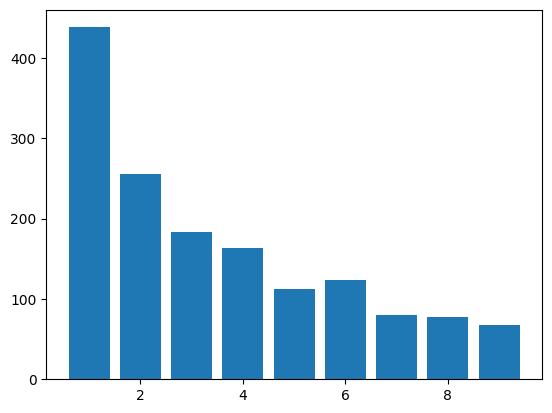

In [73]:
_, obs = np.unique(first_digit, return_counts=True)
plt.bar(np.arange(1,10), obs)

___
**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

___


## Ans.

In [74]:
from scipy.stats import chisquare
k = 9
s = 0

exp = np.empty(k)
exp.fill(n/k)
chi_sq_result = chisquare(obs,exp,ddof=s)
print(chi_sq_result)

Power_divergenceResult(statistic=670.8000000000002, pvalue=1.3805718582880795e-139)


Since the p value is smaller than 0.05, we reject the null hypothesis. The uniform distribution is not a good fit

___

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


___

In [75]:
import math
exp_benford = np.empty(k)
for d in range(1, 10):
  exp_benford[d-1] = (math.log10(d+1) - math.log10(d))*n
chi_sq_result2 = chisquare(obs,exp_benford,ddof=s)
print(chi_sq_result2)

Power_divergenceResult(statistic=9.456569118464648, pvalue=0.3052548339606756)


Since the p value is greater than 0.05, we can't reject the null hypothesis so the Benford's Law is a good fit

___

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.
___

## Ans.

In [68]:
df = pd.read_csv("/content/drive/MyDrive/orie4580/us_pop.csv")

In [82]:
n = len(df)
first_digit = np.zeros(n)
for i in range(n):
  first_digit[i] = int(str(df['population'][i])[0])
_, obs_pop = np.unique(first_digit, return_counts=True)
exp_pop_uni = np.empty(k)
exp_pop_uni.fill(n/k)
chi_sq_result_uni = chisquare(obs,exp,ddof=s)
print("uniform distribution")
print(chi_sq_result_uni)

uniform distribution
Power_divergenceResult(statistic=670.8000000000002, pvalue=1.3805718582880795e-139)


Since the p value is smaller than 0.05, we reject the null hypothesis. The uniform distribution is not a good fit

In [83]:
exp_benford_pop = np.empty(k)
for d in range(1, 10):
  exp_benford_pop[d-1] = (math.log10(d+1) - math.log10(d))*n
chi_sq_result_ben_pop = chisquare(obs_pop,exp_benford_pop,ddof=0)
print(chi_sq_result_ben_pop)

Power_divergenceResult(statistic=11.84322681811079, pvalue=0.15833698137850147)


Since the p value is greater than 0.05, we can't reject the null hypothesis so the Benford's Law is a good fit

**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.